## Cluster Analysis

Segment visitors into different groups based on their answers and analyze their distinct characteristics.

Use the clsuters created from the previous task i.e "Predictive Analysis: Based on visitor preferences, predict what new categories should be introduced for exhibitors" to perform this

In [1]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../results/visitor_preference_clusters.csv")  # update path if needed
cluster_sizes = df["cluster"].value_counts().sort_index()

In [3]:
def extract_top_keywords(texts, top_n=5):
    vectorizer = CountVectorizer(stop_words="english")
    X = vectorizer.fit_transform(texts)
    word_freq = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    word_count = dict(zip(vocab, word_freq))
    return [word for word, _ in sorted(word_count.items(), key=lambda x: -x[1])[:top_n]]

In [4]:
cluster_keywords = {}
for cluster_id in sorted(df["cluster"].unique()):
    texts = df[df["cluster"] == cluster_id]["answer"].dropna().tolist()
    keywords = extract_top_keywords(texts)
    cluster_keywords[cluster_id] = keywords

In [5]:
summary_data = []

for cluster_id in sorted(df["cluster"].unique()):
    size = cluster_sizes[cluster_id]
    keywords = ", ".join(cluster_keywords[cluster_id])
    summary_data.append({
        "Cluster": cluster_id,
        "Visitors": size,
        "Top Keywords": keywords
    })

summary_df = pd.DataFrame(summary_data)

<Figure size 600x400 with 0 Axes>

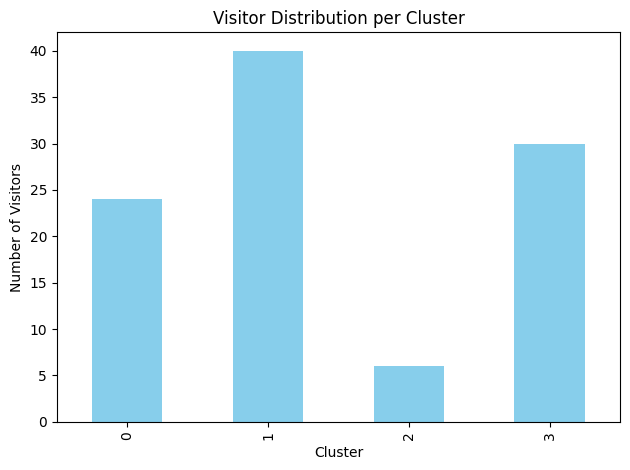

In [6]:
plt.figure(figsize=(6, 4))
summary_df.plot(kind="bar", x="Cluster", y="Visitors", legend=False, color="skyblue")
plt.title("Visitor Distribution per Cluster")
plt.ylabel("Number of Visitors")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

In [8]:
summary_df.to_csv("../results/visitor_summary.csv", index=False)

In [9]:
summary_df

,Cluster,Visitors,Top Keywords
0,0,24,"products, million, responsibility, rubles, ser..."
1,1,40,"advisory, role, agent, services, travel"
2,2,6,"10, event, management, million, products"
3,3,30,"influence, agent, travel, general, information"


As per the info above we can group the visitors into 4 groups 

In [11]:
print("Cluster 0 - commercial buyers")
print("Cluster 1 - Consulting & Agents")
print("Cluster 2 - Event Planners")
print("Cluster 3 - Info Explorers")

Cluster 0 - commercial buyers
Cluster 1 - Consulting & Agents
Cluster 2 - Event Planners
Cluster 3 - Info Explorers
